# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
cities

['cape town',
 'mataura',
 'kapaa',
 'college',
 'puerto ayora',
 'rikitea',
 'lompoc',
 'saint anthony',
 'vao',
 'te anau',
 'aykhal',
 'busselton',
 'atuona',
 'muros',
 'ushuaia',
 'saurimo',
 'scarborough',
 'khatanga',
 'clyde river',
 'caxito',
 'yamada',
 'jamestown',
 'punta arenas',
 'hermanus',
 'elko',
 'port elizabeth',
 'chernaya kholunitsa',
 'bubaque',
 'barentsburg',
 'lebu',
 'padang',
 'moroni',
 'bredasdorp',
 'samarai',
 'taolanaro',
 'saleaula',
 'barbar',
 'palauig',
 'new norfolk',
 'port alfred',
 'sorong',
 'norman wells',
 'hobart',
 'bathurst',
 'hithadhoo',
 'avarua',
 'cuenca',
 'pryazha',
 'vanimo',
 'chuy',
 'charlestown',
 'nanortalik',
 'talnakh',
 'albany',
 'njombe',
 'bluff',
 'vaini',
 'wangqing',
 'mwene-ditu',
 'faanui',
 'east london',
 'torbay',
 'ostrovnoy',
 'yulara',
 'stromness',
 'abu zabad',
 'upernavik',
 'belushya guba',
 'port macquarie',
 'cabo san lucas',
 'victoria',
 'ribeira grande',
 'vilhena',
 'ilulissat',
 'meulaboh',
 'umm ru

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print('Beginning Data Retrieval\n-----------------------------\n')

weather_list = []
rcd = 0
sets = 1

for city in cities:

    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
        
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    weather = requests.get(url).json()
    
    try:
        weather_list.append({
            'city': city,
            'lat': weather['coord']['lat'],
            'lng': weather['coord']['lon'],
            'temp': weather['main']['temp_max'],
            'humidity': weather['main']['humidity'],
            'wind':weather['wind']['speed'],
            'cloudiness':weather['clouds']['all'],
            'country':weather['sys']['country'],
            'date':weather['dt']
        })
        
    except:
        print('City not found. Skipping...')
        pass
    
print('-----------------------------\nData Retrieval Complete\n-----------------------------')
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | saint anthony
Processing Record 9 of Set 1 | vao
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | muros
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | saurimo
Processing Record 17 of Set 1 | scarborough
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | clyde river
Processing Record 20 of Set 1 | caxito
Processing Record 21 of Set 1 | yamada
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | punta arenas
Processing Reco

Processing Record 35 of Set 4 | maningrida
Processing Record 36 of Set 4 | wanning
Processing Record 37 of Set 4 | bundaberg
Processing Record 38 of Set 4 | barrow
Processing Record 39 of Set 4 | salalah
Processing Record 40 of Set 4 | puerto penasco
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | northam
Processing Record 44 of Set 4 | langenhagen
Processing Record 45 of Set 4 | urman
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | bom jesus
Processing Record 48 of Set 4 | piet retief
Processing Record 49 of Set 4 | virginia beach
Processing Record 50 of Set 4 | nuuk
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | pacific grove
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | yumen
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | mount gambier
Processing Rec

Processing Record 30 of Set 8 | baijiantan
Processing Record 31 of Set 8 | mairana
Processing Record 32 of Set 8 | bengkulu
Processing Record 33 of Set 8 | moerai
Processing Record 34 of Set 8 | brae
Processing Record 35 of Set 8 | ayni
Processing Record 36 of Set 8 | chalmette
Processing Record 37 of Set 8 | beringovskiy
Processing Record 38 of Set 8 | sola
Processing Record 39 of Set 8 | san policarpo
Processing Record 40 of Set 8 | grand gaube
Processing Record 41 of Set 8 | kuala terengganu
Processing Record 42 of Set 8 | tocopilla
Processing Record 43 of Set 8 | izhma
Processing Record 44 of Set 8 | khombole
Processing Record 45 of Set 8 | souillac
Processing Record 46 of Set 8 | tarudant
City not found. Skipping...
Processing Record 47 of Set 8 | kangalassy
Processing Record 48 of Set 8 | labutta
City not found. Skipping...
Processing Record 49 of Set 8 | le moule
Processing Record 50 of Set 8 | pleasant point
Processing Record 1 of Set 9 | dawei
Processing Record 2 of Set 9 | sh

Processing Record 15 of Set 12 | cimislia
Processing Record 16 of Set 12 | george town
Processing Record 17 of Set 12 | santa isabel do rio negro
Processing Record 18 of Set 12 | cap malheureux
Processing Record 19 of Set 12 | buin
Processing Record 20 of Set 12 | kruisfontein
Processing Record 21 of Set 12 | kavieng
Processing Record 22 of Set 12 | kysyl-syr
Processing Record 23 of Set 12 | piacabucu
Processing Record 24 of Set 12 | shanghai
Processing Record 25 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 26 of Set 12 | lagoa
Processing Record 27 of Set 12 | waitati
Processing Record 28 of Set 12 | provideniya
Processing Record 29 of Set 12 | aktash
Processing Record 30 of Set 12 | north platte
Processing Record 31 of Set 12 | portland
Processing Record 32 of Set 12 | puro
Processing Record 33 of Set 12 | negele
City not found. Skipping...
Processing Record 34 of Set 12 | bridgewater
Processing Record 35 of Set 12 | praia da vitoria
Processing Record 36 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(weather_list)
city_data.date = city_data.date.map(time.ctime)
city_data.to_csv('city_data.csv')
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,cape town,-33.9258,18.4232,63.00,94,3.44,90,ZA,Mon Apr 26 19:13:10 2021
1,mataura,-46.1927,168.8643,48.99,65,8.99,82,NZ,Mon Apr 26 19:16:27 2021
2,kapaa,22.0752,-159.3190,77.00,65,8.05,20,US,Mon Apr 26 19:16:28 2021
3,college,64.8569,-147.8028,53.01,37,20.71,20,US,Mon Apr 26 19:16:29 2021
4,puerto ayora,-0.7393,-90.3518,75.00,90,4.97,37,EC,Mon Apr 26 19:16:29 2021


In [6]:
city_data.describe()

,lat,lng,temp,humidity,wind,cloudiness
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,18.240219,25.112888,61.038098,71.021739,7.542699,54.356884
std,33.761782,92.653709,19.089052,20.607196,5.169942,38.845842
min,-54.800000,-175.200000,8.600000,1.000000,0.220000,0.000000
25%,-9.390300,-58.836775,45.547500,61.000000,3.440000,17.000000
50%,18.816700,30.096250,64.875000,75.000000,6.330000,67.000000
75%,46.661400,111.706700,77.000000,87.000000,10.005000,93.000000
max,78.218600,179.316700,90.000000,100.000000,28.770000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_data = city_data.loc[city_data["humidity"]<= 100]
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,cape town,-33.9258,18.4232,63.00,94,3.44,90,ZA,Mon Apr 26 19:13:10 2021
1,mataura,-46.1927,168.8643,48.99,65,8.99,82,NZ,Mon Apr 26 19:16:27 2021
2,kapaa,22.0752,-159.3190,77.00,65,8.05,20,US,Mon Apr 26 19:16:28 2021
3,college,64.8569,-147.8028,53.01,37,20.71,20,US,Mon Apr 26 19:16:29 2021
4,puerto ayora,-0.7393,-90.3518,75.00,90,4.97,37,EC,Mon Apr 26 19:16:29 2021


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

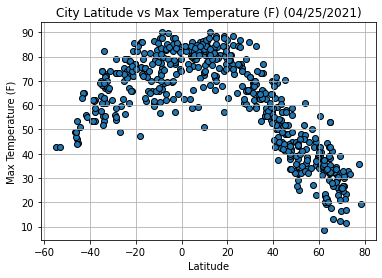

In [9]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (F) (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/city_lat_vs_max_temp.png")

## Latitude vs. Humidity Plot

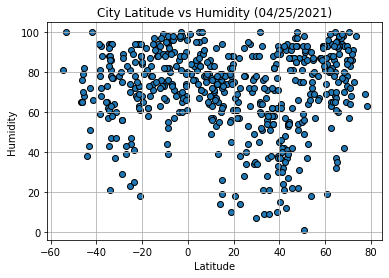

In [10]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (04/25/2021)')
plt.scatter(city_data['lat'],city_data['humidity'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

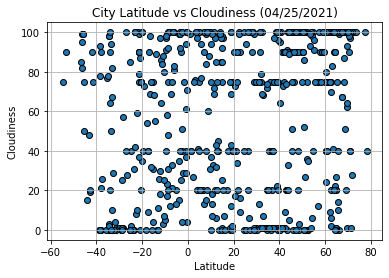

In [11]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (04/25/2021)')
plt.scatter(city_data['lat'],city_data['cloudiness'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs Cloudiness_.png")

## Latitude vs. Wind Speed Plot

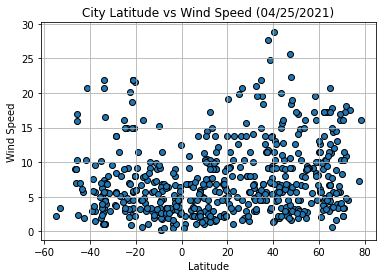

In [12]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (04/25/2021)')
plt.scatter(city_data['lat'],city_data['wind'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
northern_pd = city_data.loc[city_data["lat"]>= 0]
southern_pd = city_data.loc[city_data["lat"]<= 0]

The St. Pearson Correlation Coefficient between both factors is -0.91


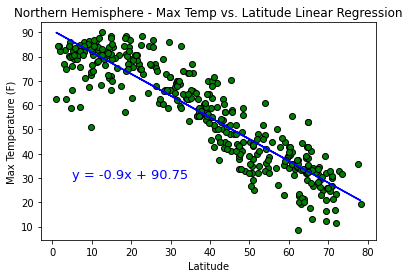

<Figure size 432x288 with 0 Axes>

In [14]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['temp'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.66


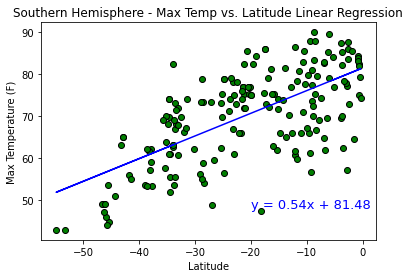

<Figure size 432x288 with 0 Axes>

In [15]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['temp'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-20,48), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.11


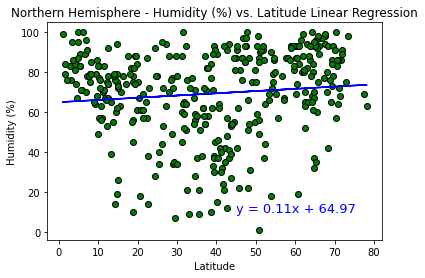

<Figure size 432x288 with 0 Axes>

In [16]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['humidity'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(45,10), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['humidity'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.2


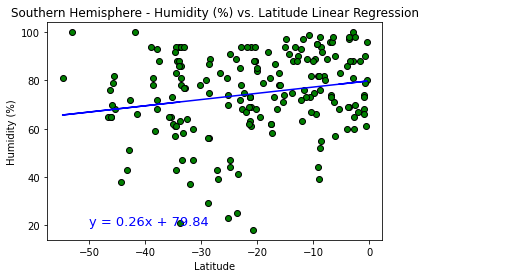

<Figure size 432x288 with 0 Axes>

In [17]:
# establish linear regression values 
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['humidity'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')

# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-50,20), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['humidity'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue") 
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.13


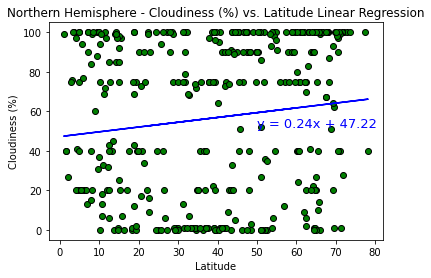

<Figure size 432x288 with 0 Axes>

In [18]:
establish_linear_regression_values = linregress(city_data["lat"], city_data["cloudiness"])
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['cloudiness'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(50,52), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'], northern_pd['cloudiness'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.13


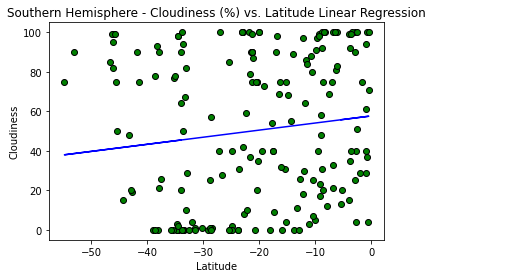

<Figure size 432x288 with 0 Axes>

In [19]:
# establish linear regression values 
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['cloudiness'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['cloudiness'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.19


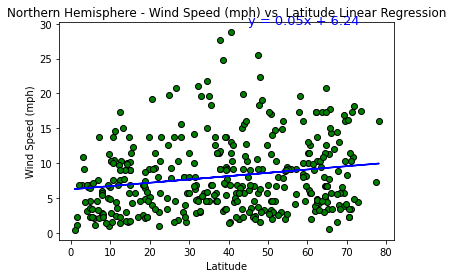

<Figure size 432x288 with 0 Axes>

In [20]:
# establish linear regression values = linregress(city_data ("lat","wind".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['wind'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(45,30), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['wind'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is -0.19


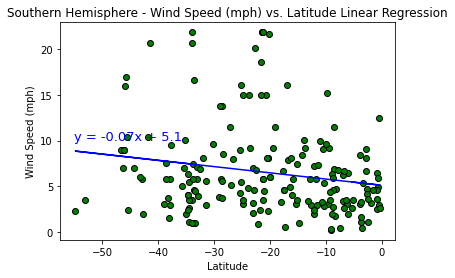

<Figure size 432x288 with 0 Axes>

In [21]:
# establish linear regression values = linregress(city_data ("lat","wind".values)
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['wind'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-55,10), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['wind'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression")